# Import Data from Activity Day Summary
Due to potential privacy issues, the file activity_day_summary.csv is not shared
CSV for calories has been filtered so we can import only important columns

In [41]:
import pandas as pd

activity_daily = pd.read_csv("activity_day_summary.csv", header=1, index_col=False)


# heart_rate_daily = pd.read_csv("heart_rate_tracker.csv", skiprows=1, index_col=False)

# Import calorie data

In [2]:
calories_daily = pd.read_csv("calories_burnt_details.csv", header=1, index_col=False)
calories_daily.columns = [column.split(".")[-1] for column in calories_daily.columns]
calories_daily = calories_daily.loc[:, ["day_time", "rest_calorie", "active_calorie"]]
calories_daily

,day_time,rest_calorie,active_calorie
0,1667865600000,1541.9856,146.20992
1,1665532800000,1661.4569,0.00000
2,1665619200000,1661.4569,0.00000
3,1665705600000,1661.4569,0.00000
4,1665792000000,1661.4569,0.00000
...,...,...,...
927,1699228800000,1559.5035,279.55518
928,1699315200000,1584.6764,142.37003
929,1699401600000,1602.8351,118.74820
930,1699488000000,1521.5763,361.14337


## Merge the 2 tables

In [3]:
activity_daily = activity_daily.merge(calories_daily, how = "outer", on = "day_time", indicator=True)
# activity_daily = activity_daily.merge(heart_rate_daily, how = "outer", on = "extra_data", suffixes= ("activity_daily", "heart_rate_daily"), indicator=True)

Drop columns with all NA values

In [4]:
activity_daily.dropna(axis=1, how = "all", inplace=True)

Check the metadata

In [5]:
activity_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932 entries, 0 to 931
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   step_count           932 non-null    int64   
 1   active_time          932 non-null    int64   
 2   target               554 non-null    float64 
 3   others_time          932 non-null    int64   
 4   update_time          932 non-null    object  
 5   create_time          932 non-null    object  
 6   goal                 932 non-null    int64   
 7   longest_active_time  932 non-null    int64   
 8   score                932 non-null    int64   
 9   distance             932 non-null    float64 
 10  calorie              932 non-null    float64 
 11  extra_data           932 non-null    object  
 12  deviceuuid           932 non-null    object  
 13  run_time             932 non-null    int64   
 14  pkg_name             932 non-null    object  
 15  walk_time            93

Format the day_time column to a normal datetime format

In [6]:
activity_daily['day_time'] = pd.to_datetime(activity_daily['day_time'], unit = 'ms')

Only get data from Week 1 onwards

In [7]:
start_date = pd.Timestamp('2023-08-07')
activity_daily = activity_daily.loc[activity_daily.day_time >= start_date]
activity_daily.reset_index(inplace=True, drop=True)

Remove all columns that only contain 0s

In [8]:
activity_daily = activity_daily.loc[:, (activity_daily != 0).any(axis=0)]

Unsure if the columns **others_time, goal and target** are important, check if they are significant or all have the same values

In [9]:
activity_daily.loc[activity_daily.others_time != 0]

,step_count,active_time,target,others_time,update_time,create_time,goal,longest_active_time,score,distance,...,deviceuuid,run_time,pkg_name,walk_time,longest_idle_time,datauuid,day_time,rest_calorie,active_calorie,_merge
49,7846,4747275,90.0,331000,2023-09-25 13:22:51.980,2023-09-24 16:00:00.776,-1,985151,86,5866.851,...,zGhikmndmN,47989,com.sec.android.app.shealth,4368286,36780000,7eba06f1-cdfd-44e1-a3c9-f9dd12449385,2023-09-25,1494.3176,358.79993,both


In [10]:
activity_daily.loc[activity_daily.goal != -1]

,step_count,active_time,target,others_time,update_time,create_time,goal,longest_active_time,score,distance,...,deviceuuid,run_time,pkg_name,walk_time,longest_idle_time,datauuid,day_time,rest_calorie,active_calorie,_merge


In [11]:
activity_daily.loc[activity_daily.target != 90]

,step_count,active_time,target,others_time,update_time,create_time,goal,longest_active_time,score,distance,...,deviceuuid,run_time,pkg_name,walk_time,longest_idle_time,datauuid,day_time,rest_calorie,active_calorie,_merge


### Seem like they are insignificant. Filter these columns along with other irrelevant columns

In [12]:
activity_daily.drop(columns=["update_time", "create_time", "others_time", "goal", "extra_data", "deviceuuid", "pkg_name", "datauuid", "target", "_merge"], inplace=True)
activity_daily.reset_index(drop=True, inplace=True)

### I realised that Samsung Health could not properly track run_time even when I was playing tennis
As such, I will just use active_time and drop run_time and walk_time too

### calorie also only seems to account for active_calorie
I will drop calorie

In [13]:
activity_daily.drop(columns=["run_time", "walk_time", "calorie"], inplace=True)
activity_daily

,step_count,active_time,longest_active_time,score,distance,longest_idle_time,day_time,rest_calorie,active_calorie
0,5285,3381817,240000,62,3803.8489,21720000,2023-08-07,1519.3068,174.290020
1,6309,3835684,360000,70,4794.8000,25920000,2023-08-08,1511.0006,194.849870
2,4882,2970008,360000,54,3722.5593,38460000,2023-08-09,1526.8431,148.599990
3,9277,5698015,300000,104,6936.2207,24600000,2023-08-10,1476.9182,287.869870
4,1854,1222551,120000,22,1384.6500,43560000,2023-08-11,1558.8231,57.369995
...,...,...,...,...,...,...,...,...,...
91,6377,3978695,896986,73,4786.9760,30720000,2023-11-06,1559.5035,279.555180
92,4361,2648291,420000,48,3288.7007,48600000,2023-11-07,1584.6764,142.370030
93,2878,1688584,718502,31,2208.2185,28440000,2023-11-08,1602.8351,118.748200
94,9854,5983192,693626,110,7574.2275,26640000,2023-11-09,1521.5763,361.143370


Samsung Health has millisecond formats for duration. Convert them to minutes with a function

In [14]:
def convert_ms_to_min(ms):
    return ms / 60000

# activity_daily[['active_time', 'longest_active_time', 'run_time', 'walk_time', 'longest_idle_time']] = activity_daily[['active_time', 'longest_active_time', 'run_time', 'walk_time', 'longest_idle_time']].map(convert_ms_to_min)
activity_daily[['active_time', 'longest_active_time', 'longest_idle_time']] = activity_daily[['active_time', 'longest_active_time', 'longest_idle_time']].map(convert_ms_to_min)

Some days were not in order. Sort the dates

In [15]:
activity_daily.sort_values(by="day_time", inplace=True)

In [16]:
activity_daily.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 0 to 95
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   step_count           96 non-null     int64         
 1   active_time          96 non-null     float64       
 2   longest_active_time  96 non-null     float64       
 3   score                96 non-null     int64         
 4   distance             96 non-null     float64       
 5   longest_idle_time    96 non-null     float64       
 6   day_time             96 non-null     datetime64[ns]
 7   rest_calorie         96 non-null     float64       
 8   active_calorie       96 non-null     float64       
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 7.5 KB


In [17]:
activity_daily.describe()

,step_count,active_time,longest_active_time,score,distance,longest_idle_time,day_time,rest_calorie,active_calorie
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96,96.000000,96.000000
mean,4205.385417,42.848381,9.445736,46.583333,3183.443487,547.481032,2023-09-23 12:00:00,1528.784848,147.449219
min,14.000000,0.155633,0.155633,0.000000,10.430000,284.000000,2023-08-07 00:00:00,652.805400,0.440000
25%,2108.250000,21.358329,4.000000,22.750000,1565.107550,420.750000,2023-08-30 18:00:00,1518.529250,67.829980
50%,4314.000000,43.041992,6.500000,46.500000,3282.437000,514.000000,2023-09-23 12:00:00,1539.310700,143.099995
75%,5835.500000,58.542979,13.309300,64.000000,4473.989875,612.250000,2023-10-17 06:00:00,1560.355150,205.514688
max,12929.000000,137.398817,79.972517,152.000000,9897.991000,1119.000000,2023-11-10 00:00:00,1606.833500,652.153300
std,2530.662977,25.828224,9.794399,28.659036,1921.998604,173.473934,NaN,95.275934,103.226479


In [18]:
activity_daily.corr()

,step_count,active_time,longest_active_time,score,distance,longest_idle_time,day_time,rest_calorie,active_calorie
step_count,1.000000,0.997614,0.667326,0.997370,0.999623,-0.378446,-0.089557,-0.113883,0.962115
active_time,0.997614,1.000000,0.674069,0.999884,0.996533,-0.381463,-0.091911,-0.114078,0.963321
longest_active_time,0.667326,0.674069,1.000000,0.674495,0.673684,-0.148412,0.128399,-0.087818,0.805536
score,0.997370,0.999884,0.674495,1.000000,0.996239,-0.380647,-0.092863,-0.116738,0.963247
distance,0.999623,0.996533,0.673684,0.996239,1.000000,-0.377322,-0.080317,-0.113489,0.963928
longest_idle_time,-0.378446,-0.381463,-0.148412,-0.380647,-0.377322,1.000000,0.080257,0.188226,-0.315017
day_time,-0.089557,-0.091911,0.128399,-0.092863,-0.080317,0.080257,1.000000,-0.077031,-0.016267
rest_calorie,-0.113883,-0.114078,-0.087818,-0.116738,-0.113489,0.188226,-0.077031,1.000000,-0.122151
active_calorie,0.962115,0.963321,0.805536,0.963247,0.963928,-0.315017,-0.016267,-0.122151,1.000000


Text(0, 0.5, 'Active Time in Seconds')

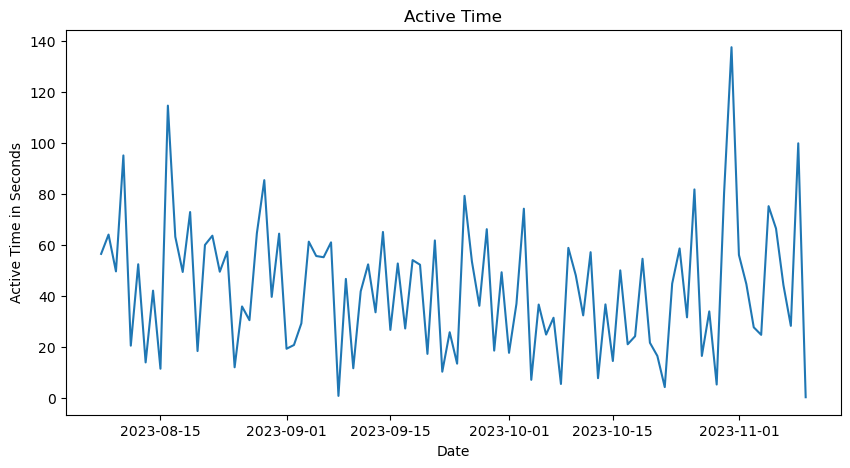

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(activity_daily.day_time, activity_daily['active_time'])
plt.title('Active Time')
plt.xlabel('Date')
plt.ylabel('Active Time in Seconds')

## Too much variation in day timeframe, switching to weekly timeframe

In [20]:
# end_date = pd.Timestamp('2023-11-08')
# activity_daily = activity_daily.iloc[:-2,:]
# activity_daily

In [21]:
# activity_daily.info()

Group dates in groups of 7

In [22]:
import numpy as np

activity_daily["week"] = np.arange(len(activity_daily)) // 7 + 1
activity_daily.set_index("week")

activity_weekly = activity_daily.groupby("week").mean()
activity_weekly.index = [i for i in activity_daily["week"].unique()]
activity_weekly

,step_count,active_time,longest_active_time,score,distance,longest_idle_time,day_time,rest_calorie,active_calorie
1,4853.857143,50.176088,4.285714,54.714286,3631.116886,515.428571,2023-08-10,1526.100929,151.409963
2,5078.571429,53.020595,8.284326,58.142857,3787.426806,503.142857,2023-08-17,1522.977457,159.680343
3,4321.428571,43.992812,10.590719,47.857143,3265.258767,451.428571,2023-08-24,1532.890443,158.950104
4,4523.571429,46.062957,9.665352,50.571429,3426.344086,532.571429,2023-08-31,1530.617343,159.757912
5,4204.428571,41.623588,11.722617,45.285714,3183.750191,658.714286,2023-09-07,1535.492000,153.178059
6,4172.142857,42.657074,9.592490,46.000000,3157.204600,501.142857,2023-09-14,1534.357186,144.902454
7,3337.428571,33.422655,7.831610,36.000000,2553.358077,633.571429,2023-09-21,1544.497100,117.992333
8,4552.285714,45.663900,8.867279,49.428571,3454.472414,489.571429,2023-09-28,1531.055543,170.547032
9,2963.428571,30.822895,4.940169,33.142857,2239.868134,722.714286,2023-10-05,1547.351743,94.216676
10,3637.714286,36.355450,8.569048,39.285714,2775.803514,480.285714,2023-10-12,1541.276686,114.007106


# Line Graph Plotting to compare over time

Plot all the indicators to observe trends over the weeks

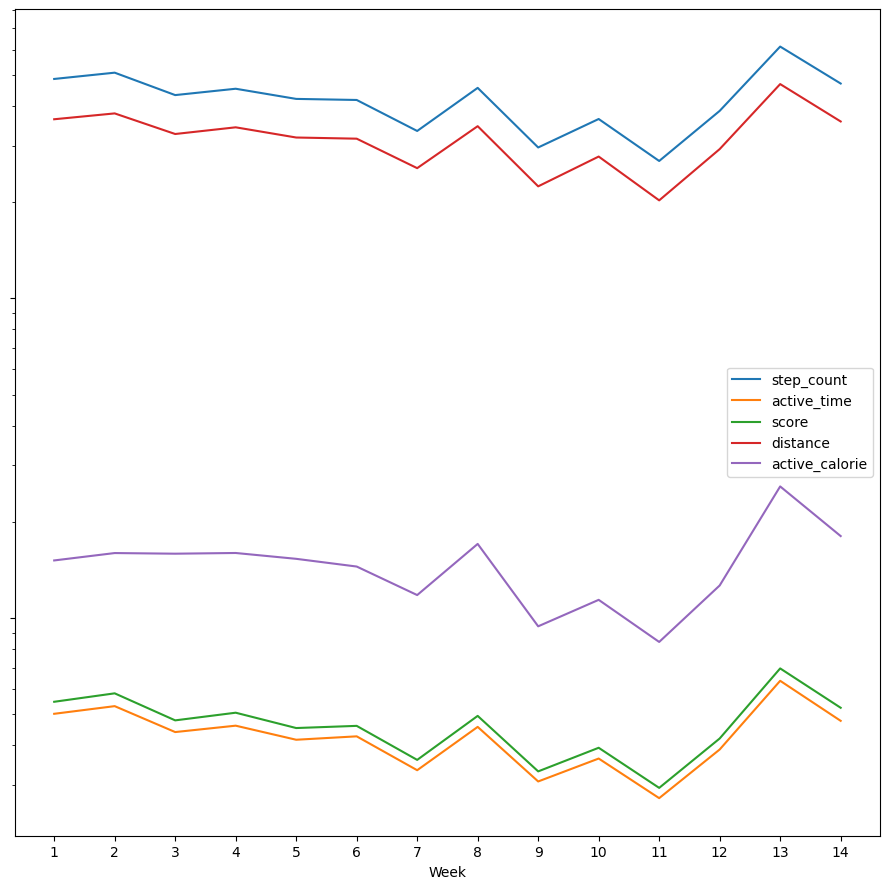

In [23]:
ax = activity_weekly[["step_count", "active_time", "score", "distance", "active_calorie"]].plot(figsize=(9,9), label='Active Time', sharey=False, sharex=False, xticks=activity_weekly.index, xlabel="Week", logy=True)
ax.set_yticklabels([])
plt.tight_layout()

plt.show()

### Because Samsung health did not manage to capture running activites, try to get the effectiveness of each active time period
- compare the **relative calories** burnt per active time
- compare the **relative distance** covered per active time

In [24]:
activity_weekly['calories_per_active_time'] = activity_weekly.active_calorie / activity_weekly.active_time
activity_weekly['distance_per_active_time'] = activity_weekly.distance / activity_weekly.active_time
activity_weekly

,step_count,active_time,longest_active_time,score,distance,longest_idle_time,day_time,rest_calorie,active_calorie,calories_per_active_time,distance_per_active_time
1,4853.857143,50.176088,4.285714,54.714286,3631.116886,515.428571,2023-08-10,1526.100929,151.409963,3.017572,72.367477
2,5078.571429,53.020595,8.284326,58.142857,3787.426806,503.142857,2023-08-17,1522.977457,159.680343,3.011666,71.433125
3,4321.428571,43.992812,10.590719,47.857143,3265.258767,451.428571,2023-08-24,1532.890443,158.950104,3.613093,74.222552
4,4523.571429,46.062957,9.665352,50.571429,3426.344086,532.571429,2023-08-31,1530.617343,159.757912,3.468251,74.383937
5,4204.428571,41.623588,11.722617,45.285714,3183.750191,658.714286,2023-09-07,1535.492000,153.178059,3.680078,76.489086
6,4172.142857,42.657074,9.592490,46.000000,3157.204600,501.142857,2023-09-14,1534.357186,144.902454,3.396915,74.013623
7,3337.428571,33.422655,7.831610,36.000000,2553.358077,633.571429,2023-09-21,1544.497100,117.992333,3.530310,76.396028
8,4552.285714,45.663900,8.867279,49.428571,3454.472414,489.571429,2023-09-28,1531.055543,170.547032,3.734833,75.649965
9,2963.428571,30.822895,4.940169,33.142857,2239.868134,722.714286,2023-10-05,1547.351743,94.216676,3.056711,72.668973
10,3637.714286,36.355450,8.569048,39.285714,2775.803514,480.285714,2023-10-12,1541.276686,114.007106,3.135901,76.351785


Calries per active time vs Active time

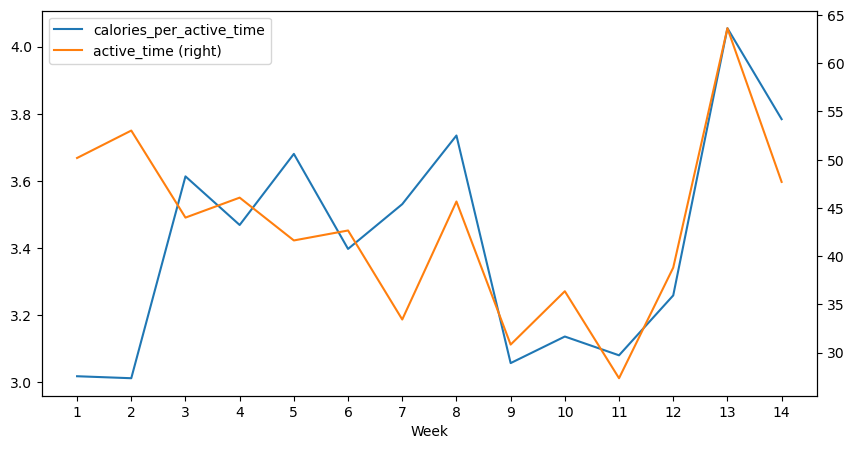

In [25]:
ax = activity_weekly.plot(y = ["calories_per_active_time", "active_time"], figsize=(10,5), xticks=activity_weekly.index, xlabel="Week", secondary_y=["active_time"])

plt.show()

Distance per active time vs Active time

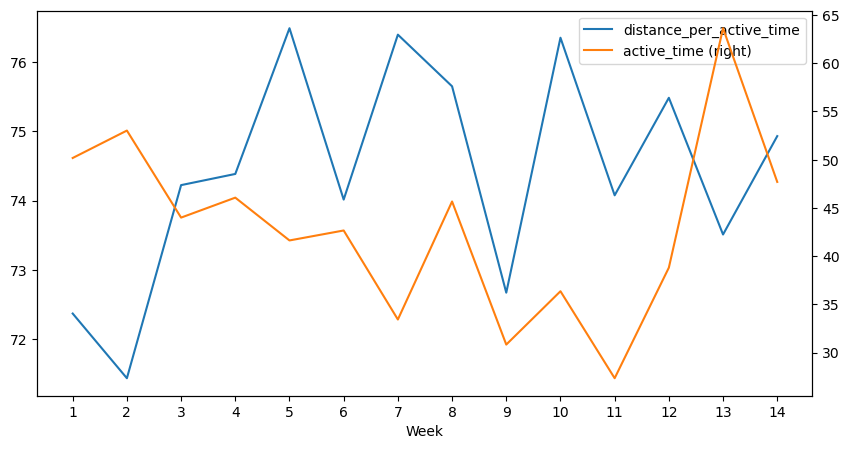

In [26]:
ax = activity_weekly.plot(y = ["distance_per_active_time", "active_time"], figsize=(10,5), xticks=activity_weekly.index, xlabel="Week", secondary_y=["active_time"])

plt.show()

### Interesting fact: The week with the lowest average idle time seems to also be the week with lowest active time

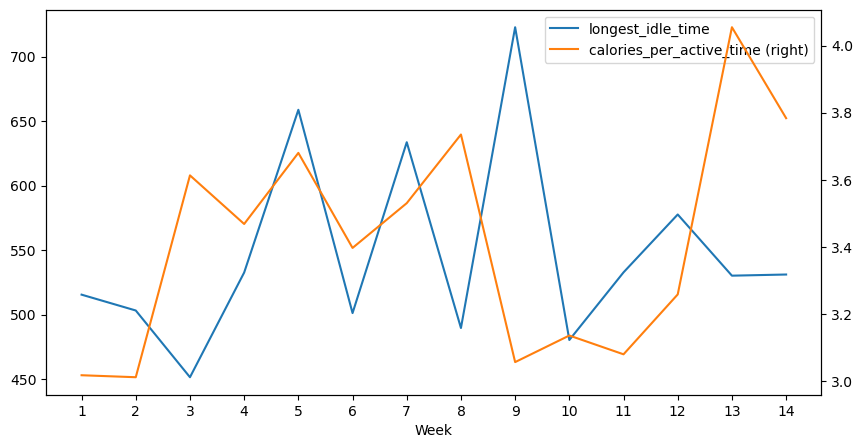

In [27]:
ax = activity_weekly.plot(y = ["longest_idle_time", "calories_per_active_time"], figsize=(10,5), xticks=activity_weekly.index, xlabel="Week", secondary_y=["calories_per_active_time"])

## Check total calories

In [28]:
activity_weekly["total_calories"] = activity_weekly.rest_calorie + activity_weekly.active_calorie
activity_weekly

,step_count,active_time,longest_active_time,score,distance,longest_idle_time,day_time,rest_calorie,active_calorie,calories_per_active_time,distance_per_active_time,total_calories
1,4853.857143,50.176088,4.285714,54.714286,3631.116886,515.428571,2023-08-10,1526.100929,151.409963,3.017572,72.367477,1677.510891
2,5078.571429,53.020595,8.284326,58.142857,3787.426806,503.142857,2023-08-17,1522.977457,159.680343,3.011666,71.433125,1682.657800
3,4321.428571,43.992812,10.590719,47.857143,3265.258767,451.428571,2023-08-24,1532.890443,158.950104,3.613093,74.222552,1691.840547
4,4523.571429,46.062957,9.665352,50.571429,3426.344086,532.571429,2023-08-31,1530.617343,159.757912,3.468251,74.383937,1690.375254
5,4204.428571,41.623588,11.722617,45.285714,3183.750191,658.714286,2023-09-07,1535.492000,153.178059,3.680078,76.489086,1688.670059
6,4172.142857,42.657074,9.592490,46.000000,3157.204600,501.142857,2023-09-14,1534.357186,144.902454,3.396915,74.013623,1679.259640
7,3337.428571,33.422655,7.831610,36.000000,2553.358077,633.571429,2023-09-21,1544.497100,117.992333,3.530310,76.396028,1662.489433
8,4552.285714,45.663900,8.867279,49.428571,3454.472414,489.571429,2023-09-28,1531.055543,170.547032,3.734833,75.649965,1701.602574
9,2963.428571,30.822895,4.940169,33.142857,2239.868134,722.714286,2023-10-05,1547.351743,94.216676,3.056711,72.668973,1641.568419
10,3637.714286,36.355450,8.569048,39.285714,2775.803514,480.285714,2023-10-12,1541.276686,114.007106,3.135901,76.351785,1655.283791


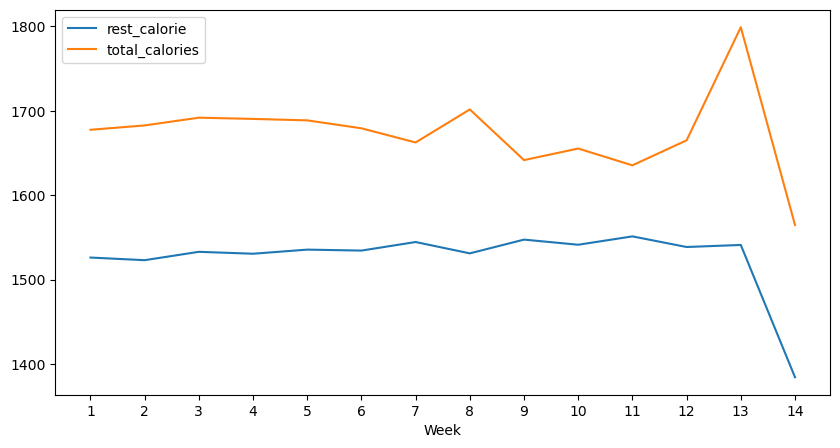

In [29]:
ax = activity_weekly.plot(y = ["rest_calorie", "total_calories"], figsize=(10,5), xticks=activity_weekly.index, xlabel="Week")

# Comparing weekdays

In [30]:
activity_daily["weekday"] = activity_daily["day_time"].dt.day_name()
activity_daily

,step_count,active_time,longest_active_time,score,distance,longest_idle_time,day_time,rest_calorie,active_calorie,week,weekday
0,5285,56.363617,4.000000,62,3803.8489,362.0000,2023-08-07,1519.3068,174.290020,1,Monday
1,6309,63.928067,6.000000,70,4794.8000,432.0000,2023-08-08,1511.0006,194.849870,1,Tuesday
2,4882,49.500133,6.000000,54,3722.5593,641.0000,2023-08-09,1526.8431,148.599990,1,Wednesday
3,9277,94.966917,5.000000,104,6936.2207,410.0000,2023-08-10,1476.9182,287.869870,1,Thursday
4,1854,20.375850,2.000000,22,1384.6500,726.0000,2023-08-11,1558.8231,57.369995,1,Friday
...,...,...,...,...,...,...,...,...,...,...,...
91,6377,66.311583,14.949767,73,4786.9760,512.0000,2023-11-06,1559.5035,279.555180,14,Monday
92,4361,44.138183,7.000000,48,3288.7007,810.0000,2023-11-07,1584.6764,142.370030,14,Tuesday
93,2878,28.143067,11.975033,31,2208.2185,474.0000,2023-11-08,1602.8351,118.748200,14,Wednesday
94,9854,99.719867,11.560433,110,7574.2275,444.0000,2023-11-09,1521.5763,361.143370,14,Thursday


## Pie chart plotting to compare between weekdays

In [31]:
activity_weekday_mean = activity_daily.groupby("weekday").agg("mean")
activity_weekday_mean

,step_count,active_time,longest_active_time,score,distance,longest_idle_time,day_time,rest_calorie,active_calorie,week
weekday,,,,,,,,,,
Friday,1740.500000,18.176725,3.688118,19.357143,1306.250791,668.441364,2023-09-25 12:00:00,1498.690893,54.212915,7.5
Monday,5658.642857,56.802192,12.825413,61.857143,4275.402986,535.000000,2023-09-21 12:00:00,1522.476529,208.534635,7.5
Saturday,3662.000000,38.310650,6.364191,41.461538,2744.593415,509.307692,2023-09-23 00:00:00,1543.181438,115.440217,7.0
Sunday,1939.000000,20.395294,5.713394,21.692308,1470.687038,622.846154,2023-09-24 00:00:00,1562.709008,68.791789,7.0
Thursday,6311.285714,64.782157,8.886837,71.000000,4779.860279,429.642857,2023-09-24 12:00:00,1517.334679,209.829872,7.5
Tuesday,5857.071429,58.586239,17.138669,64.142857,4457.982396,558.571429,2023-09-22 12:00:00,1520.576557,221.473171,7.5
Wednesday,4068.500000,40.957498,11.016825,44.428571,3095.641327,511.214286,2023-09-23 12:00:00,1539.976314,145.957189,7.5


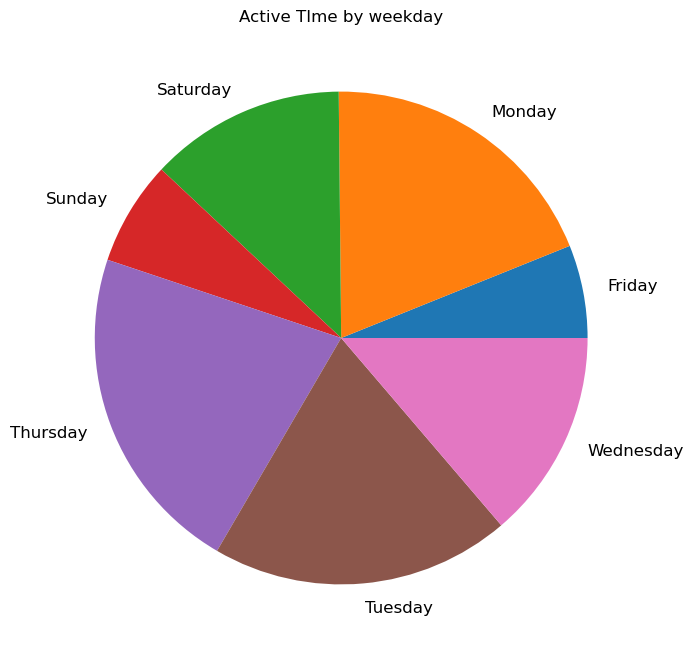

In [32]:
activity_weekday_mean.active_time.plot(kind = "pie", figsize = (12,8), fontsize = 12, title="Active TIme by weekday", ylabel='')
plt.show()

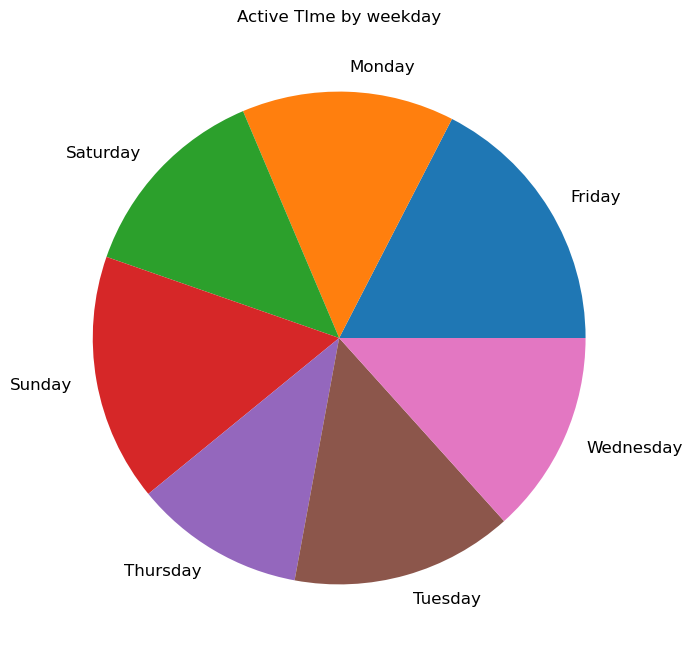

In [33]:
activity_weekday_mean.longest_idle_time.plot(kind = "pie", figsize = (12,8), fontsize = 12, title="Active TIme by weekday", ylabel='')
plt.show()

# Plot active time over time for each weekday

In [34]:
activity_daily

,step_count,active_time,longest_active_time,score,distance,longest_idle_time,day_time,rest_calorie,active_calorie,week,weekday
0,5285,56.363617,4.000000,62,3803.8489,362.0000,2023-08-07,1519.3068,174.290020,1,Monday
1,6309,63.928067,6.000000,70,4794.8000,432.0000,2023-08-08,1511.0006,194.849870,1,Tuesday
2,4882,49.500133,6.000000,54,3722.5593,641.0000,2023-08-09,1526.8431,148.599990,1,Wednesday
3,9277,94.966917,5.000000,104,6936.2207,410.0000,2023-08-10,1476.9182,287.869870,1,Thursday
4,1854,20.375850,2.000000,22,1384.6500,726.0000,2023-08-11,1558.8231,57.369995,1,Friday
...,...,...,...,...,...,...,...,...,...,...,...
91,6377,66.311583,14.949767,73,4786.9760,512.0000,2023-11-06,1559.5035,279.555180,14,Monday
92,4361,44.138183,7.000000,48,3288.7007,810.0000,2023-11-07,1584.6764,142.370030,14,Tuesday
93,2878,28.143067,11.975033,31,2208.2185,474.0000,2023-11-08,1602.8351,118.748200,14,Wednesday
94,9854,99.719867,11.560433,110,7574.2275,444.0000,2023-11-09,1521.5763,361.143370,14,Thursday


Group by week and weekday

In [35]:
activity_daily.reset_index(drop=True, inplace=True)
activity_daily.set_index(["week", "weekday"], inplace=True)
activity_daily

step_count  active_time  longest_active_time  score  \
week weekday                                                          
1    Monday           5285    56.363617             4.000000     62   
     Tuesday          6309    63.928067             6.000000     70   
     Wednesday        4882    49.500133             6.000000     54   
     Thursday         9277    94.966917             5.000000    104   
     Friday           1854    20.375850             2.000000     22   
...                    ...          ...                  ...    ...   
14   Monday           6377    66.311583            14.949767     73   
     Tuesday          4361    44.138183             7.000000     48   
     Wednesday        2878    28.143067            11.975033     31   
     Thursday         9854    99.719867            11.560433    110   
     Friday             14     0.155633             0.155633      0   

                 distance  longest_idle_time   day_time  rest_calorie  \
week weekday                                                            
1    Monday     3803.8489           362.0000 2023-08-07     1519.3068   
     Tuesday    4794.8000           432.0000 2023-08-08     1511.0006   
     Wednesday  3722.5593           641.0000 2023-08-09     1526.8431   
     Thursday   6936.2207           410.0000 2023-08-10     1476.9182   
     Friday     1384.6500           726.0000 2023-08-11     1558.8231   
...                   ...                ...        ...           ...   
14   Monday     4786.9760           512.0000 2023-11-06     1559.5035   
     Tuesday    3288.7007           810.0000 2023-11-07     1584.6764   
     Wednesday  2208.2185           474.0000 2023-11-08     1602.8351   
     Thursday   7574.2275           444.0000 2023-11-09     1521.5763   
     Friday       10.4300           415.1791 2023-11-10      652.8054   

                active_calorie  
week weekday                    
1    Monday         174.290020  
     Tuesday        194.849870  
     Wednesday      148.599990  
     Thursday       287.869870  
     Friday          57.369995  
...                        ...  
14   Monday         279.555180  
     Tuesday        142.370030  
     Wednesday      118.748200  
     Thursday       361.143370  
     Friday           0.440000  

[96 rows x 9 columns]

# Pivot Table

In [36]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

activity_daily = activity_daily.unstack()

new_order = [(data_type, day) for data_type in activity_daily.columns.get_level_values(0).unique() for day in day_order]
activity_daily = activity_daily.reindex(columns=new_order)

activity_daily

step_count                                                       \
weekday     Monday  Tuesday Wednesday Thursday  Friday Saturday  Sunday   
week                                                                      
1           5285.0   6309.0    4882.0   9277.0  1854.0   5005.0  1365.0   
2           3928.0   1033.0   11131.0   6205.0  4696.0   6817.0  1740.0   
3           6142.0   6500.0    4567.0   5484.0  1130.0   3473.0  2954.0   
4           6258.0   8699.0    4027.0   6116.0  1841.0   1884.0  2840.0   
5           6509.0   5594.0    5522.0   6114.0    61.0   4503.0  1128.0   
6           4267.0   5475.0    3249.0   6025.0  2598.0   5071.0  2520.0   
7           5691.0   5504.0    1659.0   5822.0   964.0   2448.0  1274.0   
8           7846.0   5556.0    3611.0   6631.0  1805.0   4693.0  1724.0   
9           3578.0   7077.0     628.0   3593.0  2380.0   3002.0   486.0   
10          5970.0   5097.0    3283.0   5605.0   693.0   3442.0  1374.0   
11          4833.0   1989.0    2479.0   5347.0  2148.0   1653.0   372.0   
12          4627.0   5876.0    3366.0   7917.0  1523.0   3215.0   474.0   
13          7910.0  12929.0    5677.0   4368.0  2660.0   2400.0  6956.0   
14          6377.0   4361.0    2878.0   9854.0    14.0      NaN     NaN   

        active_time                          ... rest_calorie             \
weekday      Monday     Tuesday   Wednesday  ...       Friday   Saturday   
week                                         ...                           
1         56.363617   63.928067   49.500133  ...    1558.8231  1523.7751   
2         41.945800   11.326883  114.497700  ...    1527.0884  1501.2961   
3         59.860350   63.497750   49.366333  ...    1568.1361  1541.9479   
4         64.441583   85.276350   39.503633  ...    1560.1559  1558.5430   
5         61.155667   55.524917   55.053450  ...    1580.4523  1530.0793   
6         41.676083   52.251917   33.455667  ...    1552.0417  1523.4410   
7         53.924550   52.107950   17.150017  ...    1570.0294  1553.0411   
8         79.121250   53.308550   36.007350  ...    1560.9529  1527.2185   
9         36.788167   74.080950    6.981267  ...    1554.0431  1546.8044   
10        58.713067   47.963167   32.248817  ...    1572.8236  1541.0568   
11        49.897833   20.917567   24.076283  ...    1557.5831  1563.2440   
12        44.713067   58.486283   31.479733  ...    1563.2443  1544.0780   
13        80.318067  137.398817   55.941517  ...    1603.4932  1606.8335   
14        66.311583   44.138183   28.143067  ...     652.8054        NaN   

                   active_calorie                                     \
weekday     Sunday         Monday     Tuesday   Wednesday   Thursday   
week                                                                   
1        1566.0396     174.290020  194.849870  148.599990  287.86987   
2        1561.1451     127.139950   31.599995  358.692630  192.53000   
3        1547.8547     219.457580  257.499820  210.250730  192.95198   
4        1549.2119     249.279330  328.406200  126.605316  212.11377   
5        1568.5541     250.834380  228.951430  197.880170  217.43048   
6        1551.4321     154.527680  170.799970  102.040520  241.01593   
7        1566.5638     202.914900  222.918320   51.400196  205.15295   
8        1561.9082     358.799930  218.840670  158.408690  202.46996   
9        1575.3187     110.279976  239.626820   18.999998  111.44998   
10       1565.4286     189.594480  163.829990  104.035310  170.78000   
11       1576.6560     150.859990   63.479992   80.679990  161.80997   
12       1575.5555     146.410000  185.297990  146.843250  244.25995   
13       1549.5488     305.541500  652.153300  220.215650  136.64000   
14             NaN     279.555180  142.370030  118.748200  361.14337   

                                             
weekday      Friday    Saturday      Sunday  
week                                         
1         57.369995  155.530000   41.359993  
2        146.509930  206.59990

In [37]:
sub_df = activity_daily.loc[:, "active_time"]
sub_df

weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
week,,,,,,,
1,56.363617,63.928067,49.500133,94.966917,20.375850,52.294133,13.803900
2,41.945800,11.326883,114.497700,63.069983,49.276800,72.765817,18.261183
3,59.860350,63.497750,49.366333,57.221767,11.894550,35.744200,30.364733
4,64.441583,85.276350,39.503633,64.297183,19.162133,20.631033,29.128783
5,61.155667,55.524917,55.053450,60.886117,0.678117,46.552983,11.513867
6,41.676083,52.251917,33.455667,64.958750,26.551717,52.598417,27.106967
7,53.924550,52.107950,17.150017,61.637783,10.170250,25.641650,13.326383
8,79.121250,53.308550,36.007350,66.049350,18.436283,49.158283,17.566233
9,36.788167,74.080950,6.981267,36.506250,24.729083,31.321267,5.353283


## Create function to plot different datatypes

In [38]:
# from scipy.interpolate import interp1d

def plot_value_over_time(data_type):
    fig, axs = plt.subplots(7, 1, figsize=(12, 24)) 

    week_no = activity_daily.index
    weekdays = activity_daily.columns.get_level_values(1).unique()

    for i, day in enumerate(weekdays):

        data_for_day = activity_daily.loc[:,(data_type, day)]

        axs[i].plot(week_no, data_for_day, label=day)

        # spline = interp1d(week_no, data_for_day, kind='cubic')

        # smooth_week = np.linspace(week_no.min(), week_no.max(), 100)
        # smooth_active_time = spline(smooth_week)
        # axs[i].plot(smooth_week, smooth_active_time, label=day)
        
        axs[i].legend()
        axs[i].set_xticks(week_no)
        
    plt.show()


    # plt.title(f'{data_type} for Each Weekday Over 14 Weeks')
    # plt.xlabel('Week')
    # plt.ylabel(f'{data_type}')

    

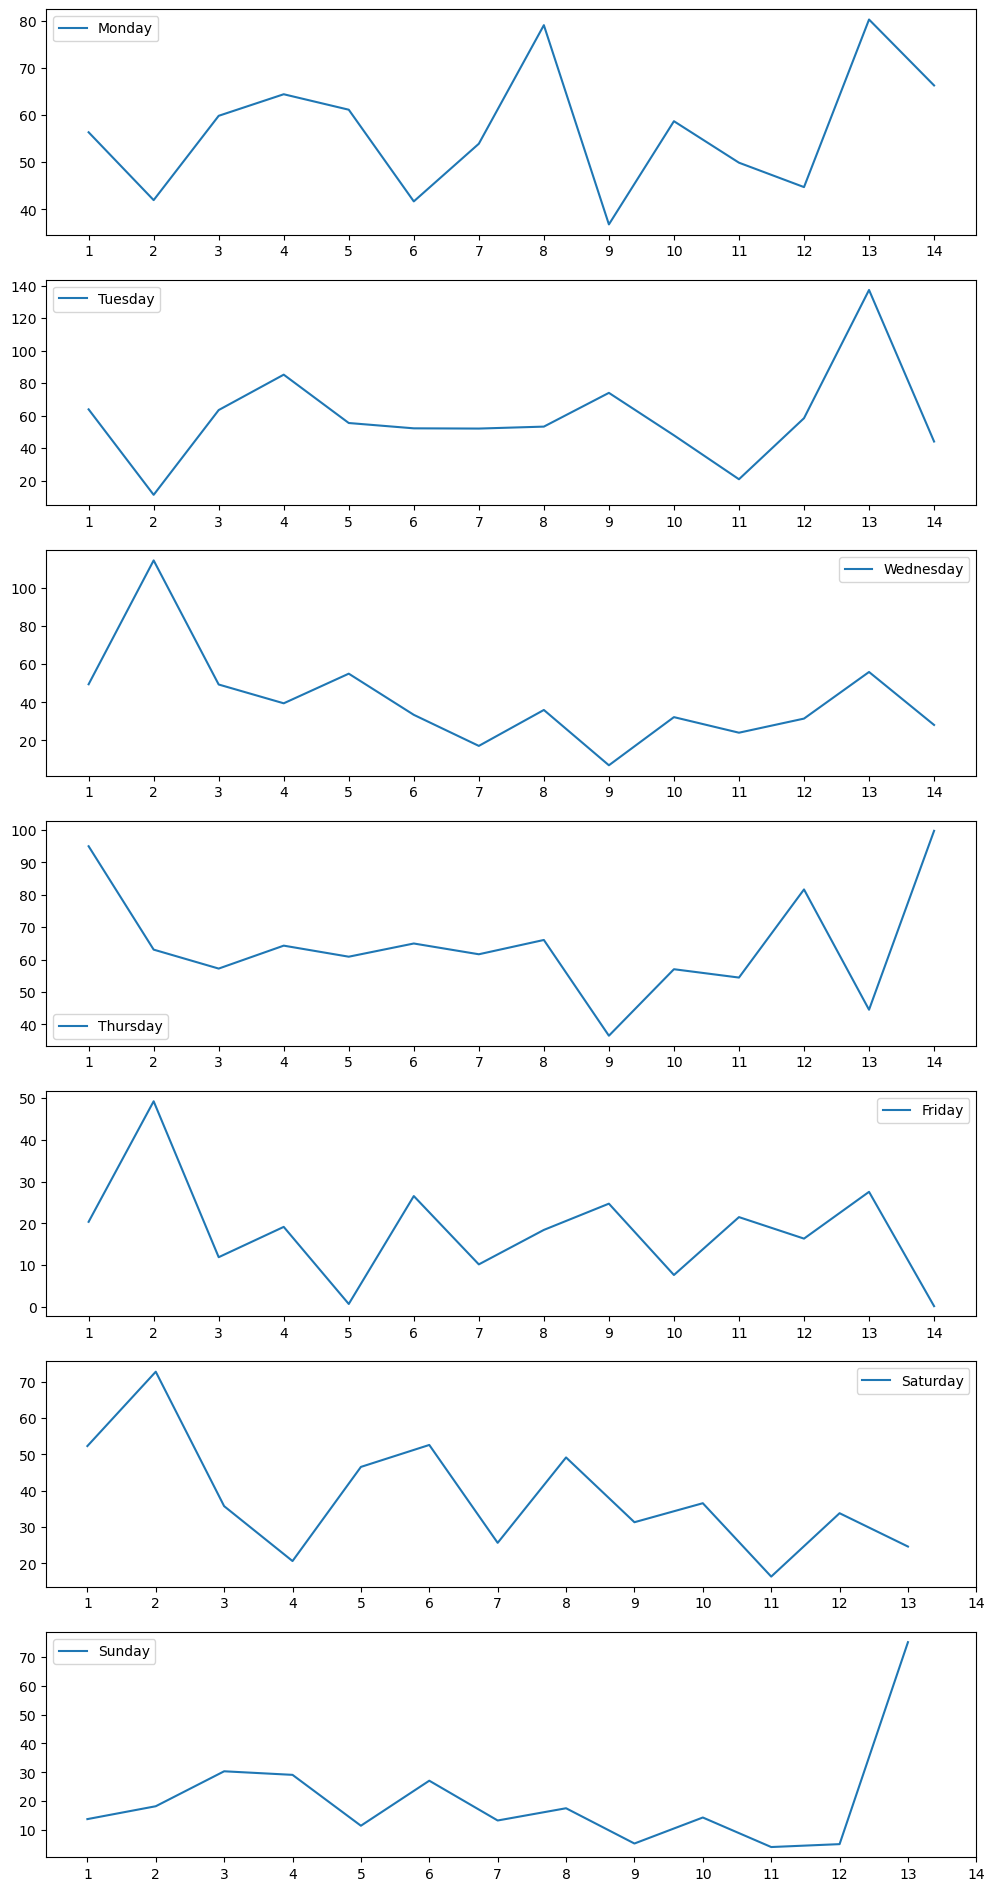

In [39]:
plot_value_over_time("active_time")

## A linear regression model would be better

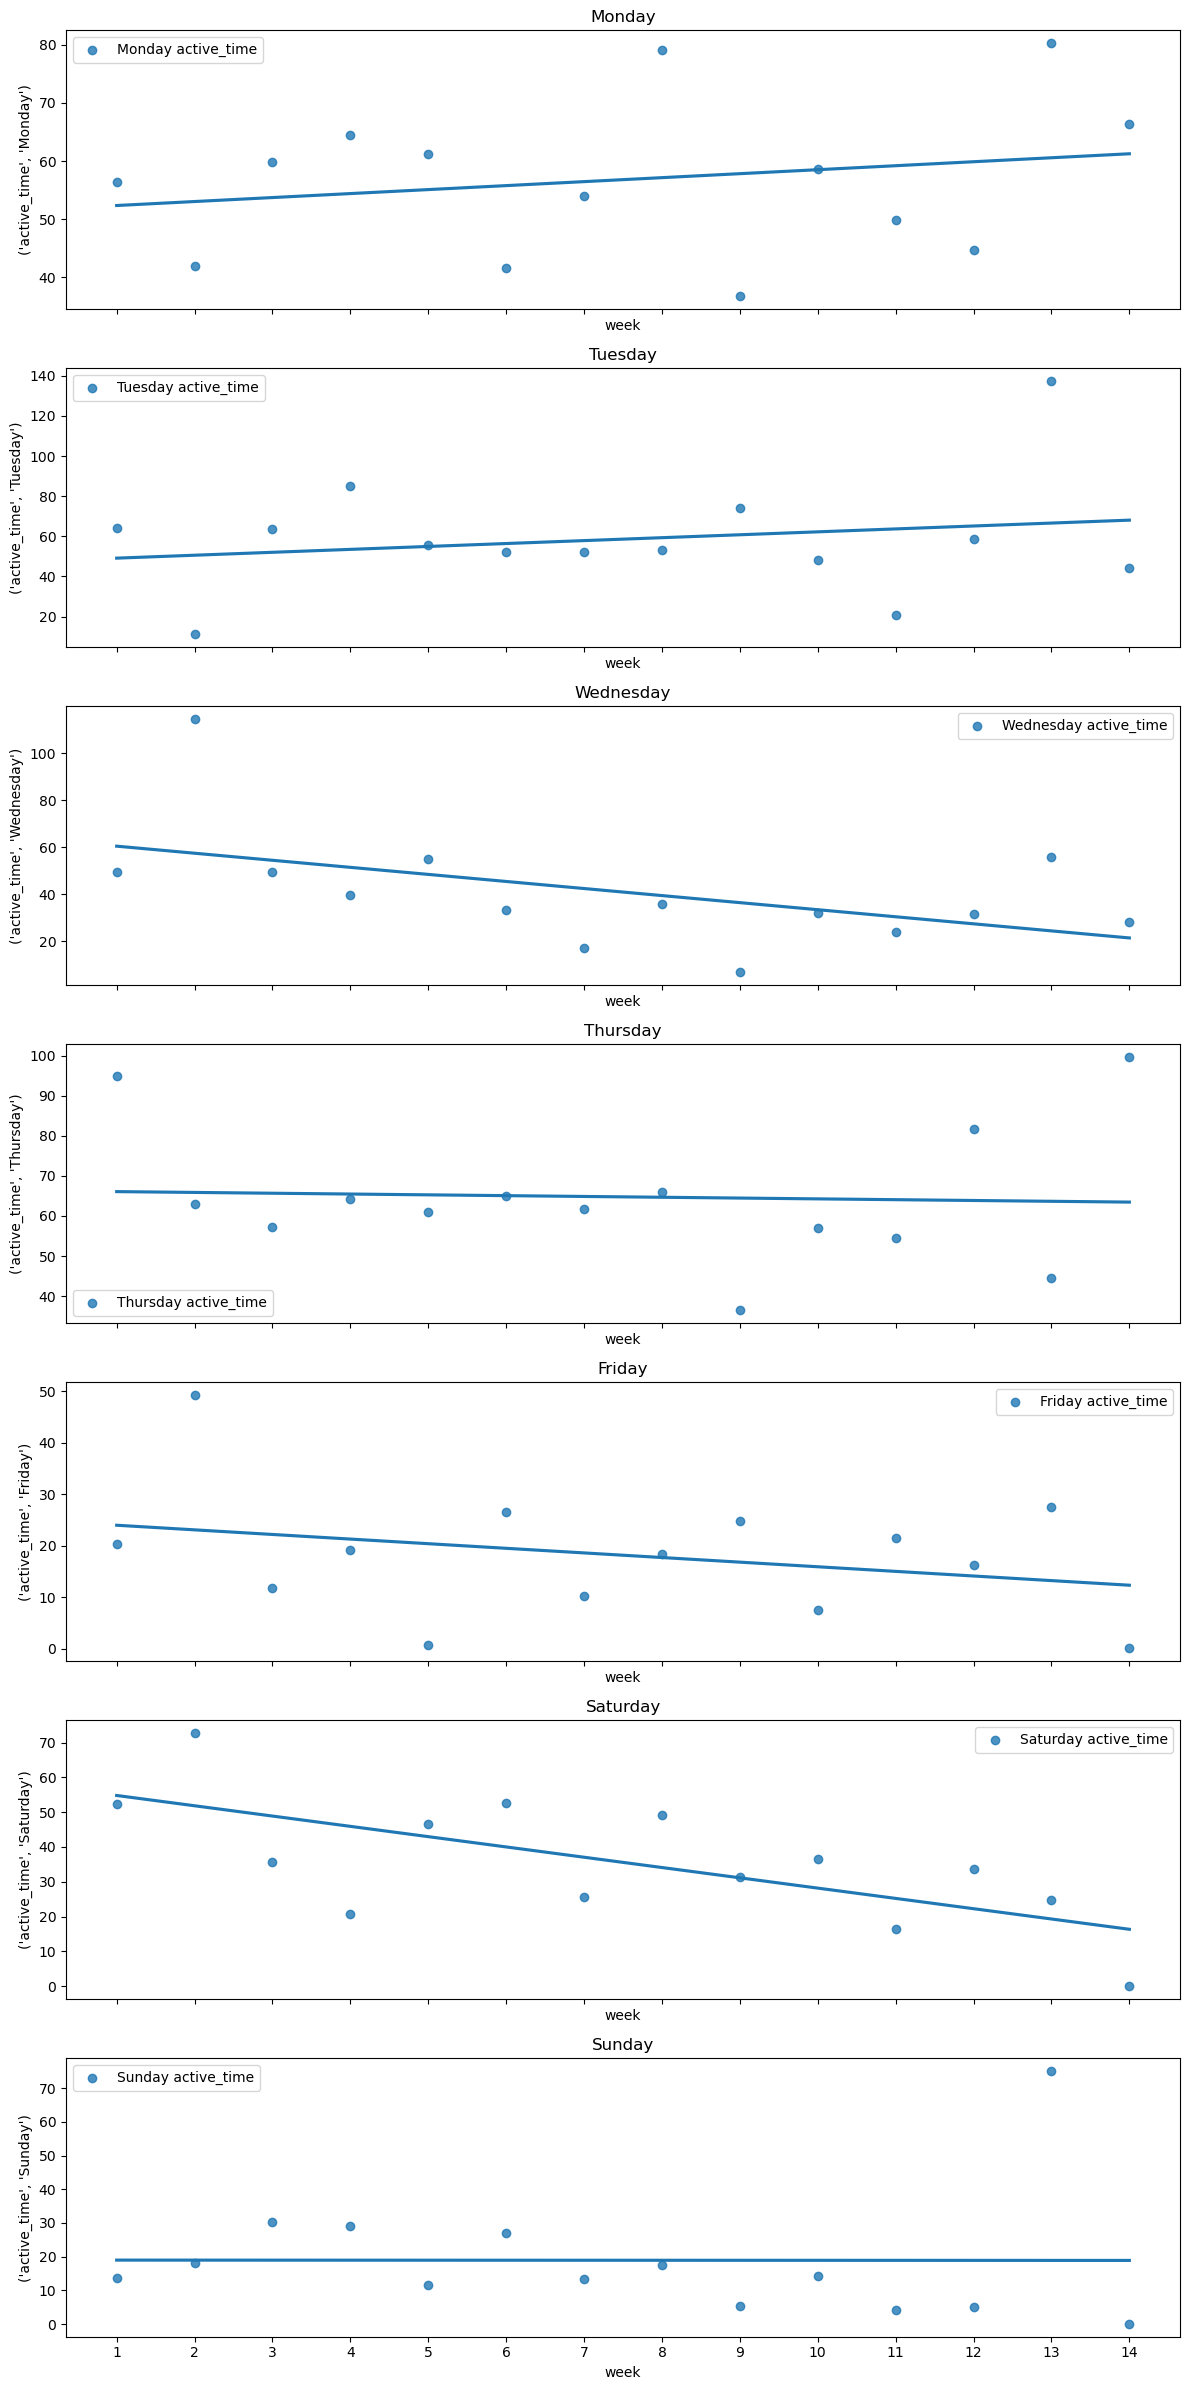

In [40]:
import seaborn as sns

def plot_value_over_time(data_type):
    fig, axs = plt.subplots(7, 1, figsize=(12, 24), sharex=True)

    week_no = activity_daily.index
    weekdays = activity_daily.columns.get_level_values(1).unique()

    for i, day in enumerate(weekdays):
        data_for_day = activity_daily.loc[:, (data_type, day)].fillna(0)  # Fill NaN values

        sns.regplot(x=week_no, y=data_for_day, ax=axs[i], ci=None, label=f'{day} {data_type}')
        
        axs[i].legend()
        axs[i].set_title(f'{day}')
        axs[i].set_xticks(week_no)
        
    # Adjust the layout
    plt.tight_layout()
    plt.show()

# Call the function with the desired data_type
plot_value_over_time('active_time')